<h1><strong>CSE 555 - Introduction to Pattern Recognition</strong></h1>

<h3><strong>Programming Assignment 3 - Exact Inference with Probabilistic Graphical Models</strong><h3>

<h4><strong> JYOTI SINHA</strong></h4>


<h5><strong>Problem 1</strong><h4>

In [2]:
#Importing the libraries
!pip install pgmpy
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel
import networkx 
from matplotlib import pyplot as plt
import pydot
from pgmpy.inference import VariableElimination

     |████████████████████████████████| 317kB 2.7MB/s 


In [ ]:
# # #First set the structure
chest_model = BayesianModel([('asia','tub'),('smoke','lung'),('smoke','bronc'),
                       ('tub','either'),('lung','either'),('either','xray'),
                       ('bronc','dysp'),('either','dysp')])
cpd_asia = TabularCPD(variable='asia', variable_card=2,values=[[.01],[.99]])
cpd_tub = TabularCPD(variable='tub',variable_card=2,values=[[.05,.01],[.95,.99]],evidence=['asia'],evidence_card=[2])
cpd_smoke = TabularCPD(variable='smoke', variable_card=2, values=[[.5],[.5]])
cpd_lung = TabularCPD(variable='lung', variable_card=2, values=[[.1,.01],[.9,.99]], evidence=['smoke'], evidence_card=[2])
cpd_bronc = TabularCPD(variable='bronc', variable_card=2, values=[[.6,.3],[.4,.7]], evidence=['smoke'], evidence_card=[2])
cpd_either = TabularCPD(variable='either', variable_card=2, values=[[1,1,1,0],[0,0,0,1]], evidence=['lung','tub'],  evidence_card=[2,2])
cpd_xray = TabularCPD(variable='xray', variable_card=2, values=[[.98,.05],[.02,.95]], evidence=['either'],evidence_card=[2])
cpd_dysp = TabularCPD(variable='dysp', variable_card=2,values=[[.9,.7,.8,.1],[.1,.3,.2,.9]], evidence=['bronc','either'],evidence_card=[2,2])

In [ ]:
#Adding all the CPDs to the model
chest_model.add_cpds(cpd_asia, cpd_tub,cpd_smoke,  cpd_lung, cpd_bronc, cpd_either, cpd_xray, cpd_dysp)


In [ ]:
#Displaying the nodes:-
chest_model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

In [ ]:
#Displaying the edges:-
chest_model.edges()


OutEdgeView([('asia', 'tub'), ('tub', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp'), ('either', 'xray'), ('either', 'dysp')])

In [ ]:
#Find active trail nodes:-
chest_model.active_trail_nodes('asia')

{'asia': {'asia', 'dysp', 'either', 'tub', 'xray'}}

In [ ]:
chest_model.active_trail_nodes('tub')


{'tub': {'asia', 'dysp', 'either', 'tub', 'xray'}}

In [ ]:
chest_model.active_trail_nodes('either')


{'either': {'asia', 'bronc', 'dysp', 'either', 'lung', 'smoke', 'tub', 'xray'}}

In [ ]:
#Examine the structure of the graph:-
chest_model.get_cpds()

[<TabularCPD representing P(asia:2) at 0x7f6fe7f4efd0>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7f6fe7e7ce80>,
 <TabularCPD representing P(smoke:2) at 0x7f6fe7e7c7f0>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7f6fe7e7c7b8>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7f6fe7e7cc88>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x7f6fe7e7cdd8>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7f6fe7e7ceb8>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x7f6fe7e7ca20>]

In [ ]:
#Finding the local Independencies:-
chest_model.local_independencies('asia')

(asia _|_ bronc, lung, smoke)

In [ ]:
chest_model.local_independencies('tub')

(tub _|_ bronc, lung, smoke | asia)

In [ ]:
chest_model.local_independencies('either')

(either _|_ asia, bronc, smoke | lung, tub)

In [ ]:
#Finding all the independencies:-
chest_model.get_independencies()

(asia _|_ bronc, smoke, lung)
(asia _|_ smoke, lung | bronc)
(asia _|_ smoke, lung, xray, dysp, bronc, either | tub)
(asia _|_ bronc, lung | smoke)
(asia _|_ bronc, smoke | lung)
(asia _|_ xray | either)
(asia _|_ smoke, lung, xray, dysp, either | bronc, tub)
(asia _|_ lung | bronc, smoke)
(asia _|_ smoke | bronc, lung)
(asia _|_ xray, dysp | bronc, either)
(asia _|_ lung, xray, dysp, bronc, either | smoke, tub)
(asia _|_ smoke, xray, dysp, bronc, either | lung, tub)
(asia _|_ smoke, lung, dysp, bronc, either | xray, tub)
(asia _|_ smoke, lung, xray, bronc, either | dysp, tub)
(asia _|_ smoke, lung, xray, dysp, bronc | tub, either)
(asia _|_ bronc | smoke, lung)
(asia _|_ bronc | xray, smoke)
(asia _|_ xray, dysp, bronc | smoke, either)
(asia _|_ bronc, smoke | xray, lung)
(asia _|_ xray, dysp, bronc, smoke | lung, either)
(asia _|_ xray | dysp, either)
(asia _|_ xray, dysp, lung, either | bronc, tub, smoke)
(asia _|_ xray, dysp, smoke, either | lung, bronc, tub)
(asia _|_ dysp, smoke,

In [ ]:
#Printing all the cpds
for allcpd in chest_model.get_cpds():
  print(" allcpd of {variable}:".format(variable=allcpd.variable))
  print(allcpd)

 allcpd of asia:
+---------+------+
| asia(0) | 0.01 |
+---------+------+
| asia(1) | 0.99 |
+---------+------+
 allcpd of tub:
+--------+---------+---------+
| asia   | asia(0) | asia(1) |
+--------+---------+---------+
| tub(0) | 0.05    | 0.01    |
+--------+---------+---------+
| tub(1) | 0.95    | 0.99    |
+--------+---------+---------+
 allcpd of smoke:
+----------+-----+
| smoke(0) | 0.5 |
+----------+-----+
| smoke(1) | 0.5 |
+----------+-----+
 allcpd of lung:
+---------+----------+----------+
| smoke   | smoke(0) | smoke(1) |
+---------+----------+----------+
| lung(0) | 0.1      | 0.01     |
+---------+----------+----------+
| lung(1) | 0.9      | 0.99     |
+---------+----------+----------+
 allcpd of bronc:
+----------+----------+----------+
| smoke    | smoke(0) | smoke(1) |
+----------+----------+----------+
| bronc(0) | 0.6      | 0.3      |
+----------+----------+----------+
| bronc(1) | 0.4      | 0.7      |
+----------+----------+----------+
 allcpd of either:
+----

 <h2>Making Independencies</h2>



In [ ]:
# finding the joint Probability(problem 0)
chest_model_infer=VariableElimination(model)
joint_prob = chest_model_infer.query(variables=['tub','lung','bronc'],
                               evidence={'asia':0,'xray':0},joint=False)

print(joint_prob['tub'])
print(joint_prob['lung'])
print(joint_prob['bronc'])

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 294.67it/s]

+--------+------------+
| tub    |   phi(tub) |
+========+============+
| tub(0) |     0.3377 |
+--------+------------+
| tub(1) |     0.6623 |
+--------+------------+
+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.3715 |
+---------+-------------+
| lung(1) |      0.6285 |
+---------+-------------+
+----------+--------------+
| bronc    |   phi(bronc) |
+==========+==============+
| bronc(0) |       0.4911 |
+----------+--------------+
| bronc(1) |       0.5089 |
+----------+--------------+


In [ ]:
tub_infer=chest_model_infer.query(variables=['tub'])
print(tub_infer)

Eliminating: xray: 100%|██████████| 7/7 [00:00<00:00, 354.39it/s]

+--------+------------+
| tub    |   phi(tub) |
+========+============+
| tub(0) |     0.0104 |
+--------+------------+
| tub(1) |     0.9896 |
+--------+------------+


In [ ]:
asia_infer=chest_model_infer.query(variables=['asia'])
print(asia_infer)

Eliminating: either: 100%|██████████| 7/7 [00:00<00:00, 520.92it/s]

+---------+-------------+
| asia    |   phi(asia) |
+=========+=============+
| asia(0) |      0.0100 |
+---------+-------------+
| asia(1) |      0.9900 |
+---------+-------------+


In [ ]:
either_infer=chest_model_infer.query(variables=['either'])
print(either_infer)

Eliminating: xray: 100%|██████████| 7/7 [00:00<00:00, 456.24it/s]

+-----------+---------------+
| either    |   phi(either) |
+===========+===============+
| either(0) |        0.0648 |
+-----------+---------------+
| either(1) |        0.9352 |
+-----------+---------------+


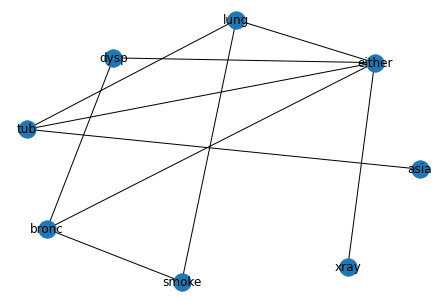

In [ ]:
moral_tree = chest_model.to_markov_model()
networkx.draw(moral_tree, with_labels=True)
plt.show()

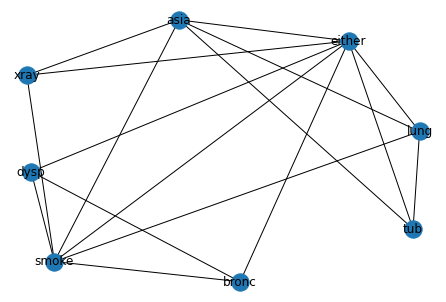

In [ ]:
triangulate_tree = moral_tree.triangulate()
networkx.draw(triangulate_tree, with_labels=True)
plt.show()

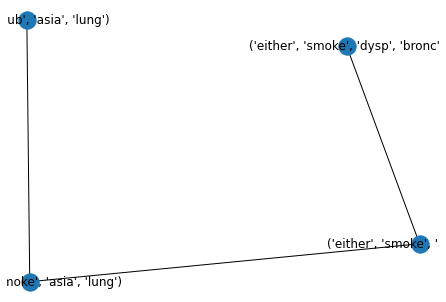

In [ ]:
junction_tree = triangulate_tree.to_junction_tree()
networkx.draw(junction_tree, with_labels=True)


<h5><strong> Problem 2</strong></h5>

<h1> Running Intersection Property</h1>

According to running intersection property, for each pair of cluster B and C that contain i then each cluster on the unique path between B and C also contain i.
In my junction tree , I can see that this condition is satisfied.
Eg:- For the cluster (either, smoke,bronc,dysp),(either,smoke,asia),(asia,lung,smoke). smoke is present in the first and last cluster. We can easily see that either is also present in the middle cluster.This suggest that Running Intersection property is satisfied for these clusters.
It is true for all the other nodes. So, we can say that the this junction tree satisfy the running intersection property. 